### Student Details

Student Name: ESPINOUX Jules

Student ID: 24267228

# Discrete random variable:

I bet on a cyclist on the fact that he finishes in the top 10 of the races he takes part in. I win 20 euros if he does a top 3 (10% of chance), I win 5 euros if he does a top 10 (between 4th and 10th, 30% of chance), and I lose 6 euros if he finishes over the top 10 (60% of chance). 100 cyclists take part in all races the cyclist takes part in.

money_mean: -0.0817
money_std: 8.2829357784544


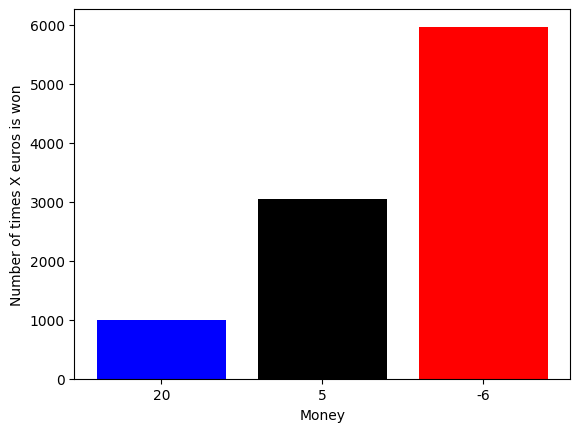

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_ranking(): ### function to generate an integer between 1 and 100 with the probabilities mentionned above ###
    random_number = random.random()
    if random_number <= 0.1: # 10 % of chance
        return (random.randint(1,3), 20)
    elif random_number <= 0.40: # 30 % of chance
        return (random.randint(4,10), 5)
    else: # 50 % of chance
        return (random.randint(11,100), -6)

number_of_races = 10000

ranking_list = []
money_list = []
money_earned = 0

for number_race in range(number_of_races):
    ranking = generate_ranking()[0]
    money_list.append(generate_ranking()[1])
    ranking_list.append(ranking)
    
### Calculate expected value and standard deviation

ranking_mean = np.mean(ranking_list)
ranking_std = np.std(ranking_list)
money_mean = np.mean(money_list)
money_std = np.std(money_list)    

    
# print("ranking_mean: " + str(ranking_mean))
# print("ranking_std: " + str(ranking_std))
print("money_mean: " + str(money_mean))
print("money_std: " + str(money_std))

# plt.scatter(np.arange(number_of_races), ranking_list, s=0.1)

# Ranking

# for j in range(1,101):
#     if j <= 3:
#         plt.bar(j, ranking_list.count(j), color="blue")
#     elif j <= 10:
#         plt.bar(j, ranking_list.count(j), color="black")
#     else:
#         plt.bar(j, ranking_list.count(j), color="red")
        
# plt.show()

# Money

plt.bar([1,2,3], [money_list.count(20), money_list.count(5), money_list.count(-6)], color=["blue", "black", "red"])
plt.xticks([1,2,3], [20, 5, -6])
plt.xlabel("Money")
plt.ylabel("Number of times X euros is won")
plt.show()


# Continuous random variable:

Let's consider all number 10 players in all rugby leagues in the world. Each number 10 kicks all the penalties from his team. The kicking success follows a normal distribution with mean 60%, standard deviation 10. In his final game of the season, each player has penalties to kick. If his kicking success is over 75%, he would score 18 points, if it is under 50% he would score 6 points, and 9 points if it is between 50% and 75%.



Points mean: 9.1206
Points standard deviation: 2.6559472208611377


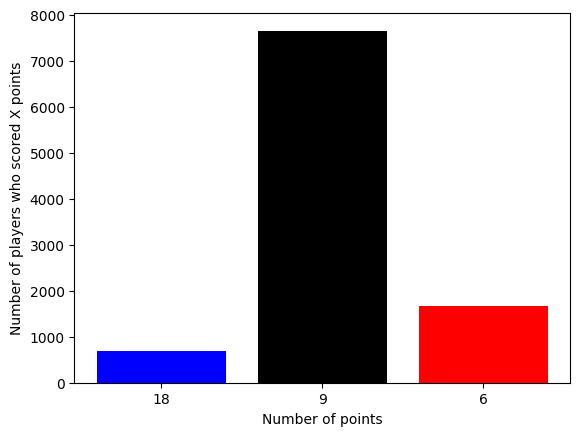

In [2]:
def generate_kicking_success(): ### function to generate the kicking success of a player and the points he would score in the last game of the season
    kicking_success = random.normalvariate(60,10)
    if kicking_success <= 50:
        return (kicking_success, 6)
    elif kicking_success >= 75:
        return (kicking_success, 18)
    else:
        return(kicking_success, 9)   

number_of_players = 10000

kicking_success_list = []
points_last_game_list = []

for i in range(number_of_players):
    
    kicking_success = generate_kicking_success()[0]
    points_last_game = generate_kicking_success()[1]
    
    kicking_success_list.append(kicking_success)
    points_last_game_list.append(points_last_game)
    
print("Points mean: " + str(np.mean(points_last_game_list)))
print("Points standard deviation: " + str(np.std(points_last_game_list)))   
    
# Points on the last game

plt.bar([1,2,3], [points_last_game_list.count(18), points_last_game_list.count(9), points_last_game_list.count(6)], color=["blue", "black", "red"])
plt.xticks([1,2,3], [18, 9, 6])
plt.xlabel("Number of points")
plt.ylabel("Number of players who scored X points")
plt.show()
    

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations - Discrete random variable

The manual calculation of the mean is -0.1 euro won (0.1*20 + 0.3*5 - 0.6*6 = -0.1).

The manual calculation of the standard deviation is around 8.31.


# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [3]:
# Read the data from the .csv, using the first row as the headers of the data

# import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

path_csv_file = Path.cwd().joinpath("01_heights_weights_sex.csv")

data = pd.read_csv(path_csv_file, header=0)

In [4]:
# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Sex,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise


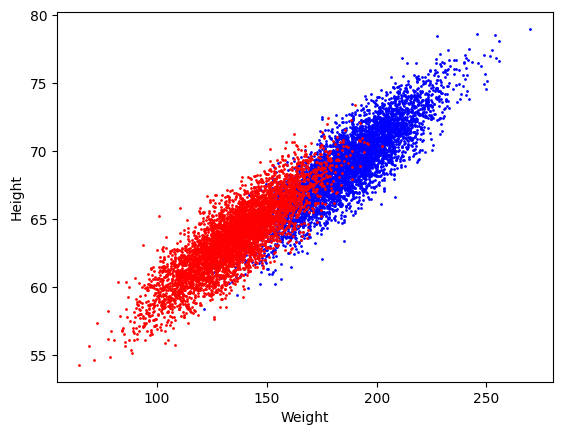

In [5]:
################################

males = data[data["Sex"] == "Male"]
females = data[data["Sex"] != "Male"]

plt.scatter(males["Weight"], males["Height"], color="blue", s=1)
plt.scatter(females["Weight"], females["Height"], color="red", s=1)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [6]:
X = data.iloc[:,1:3] # X is the features in our dataset # Height | Weight
y = data.iloc[:,0]   # y is the Labels in our dataset # Gender


### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [7]:
# ################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# print("X_train: " + str(X_train))
# print("X_test: " + str(X_test))
# print("y_train: " + str(y_train))
# print("y_test: " + str(y_test))


### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [8]:
from sklearn.naive_bayes import GaussianNB

################################

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

### Test the algorithm
Using the test data

In [9]:
################################
y_predict = model.predict(X_test)
print("X_test: " + str(X_test))

X_test:          Height      Weight
1191  70.064688  192.045218
8729  65.816123  148.475425
9619  64.507140  141.552481
3860  69.958719  188.787361
7918  63.765328  143.919802
...         ...         ...
4306  71.190299  183.845507
3381  67.744707  176.264736
8614  62.993230  139.408492
3832  69.751788  184.158554
1583  71.912119  204.780911

[3300 rows x 2 columns]


In [10]:
from sklearn.metrics import accuracy_score

################################

score = accuracy_score(y_predict, y_test)

print("score: " + str(score))

score: 0.8887878787878788


### Plot the random samples

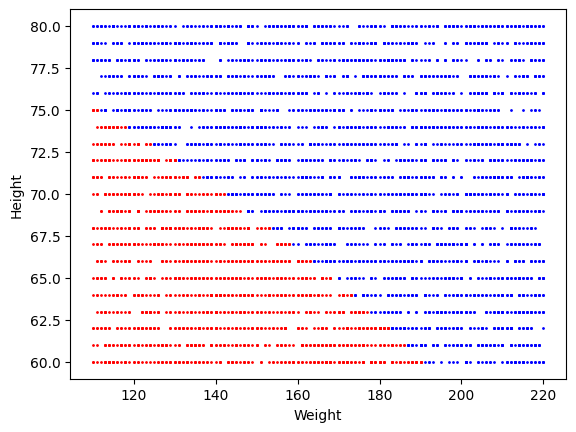

In [11]:
################################

#### Create the samples ####

heights = [random.randint(60,80) for _ in range(5000)]
weights = [random.randint(110,220) for _ in range(5000)]

X_random = pd.DataFrame({'Height': heights, 'Weight': weights})
y_random_predict = model.predict(X_random)

# print("y_random_predict: " + str(y_random_predict))

#### Plot of the samples ####

df_predicted = pd.DataFrame({'Height': heights, 'Weight': weights, 'Sex': list(y_random_predict)})

males = df_predicted[df_predicted["Sex"] == "Male"]
females = df_predicted[df_predicted["Sex"] != "Male"]

plt.scatter(males["Weight"], males["Height"], color="blue", s=1)
plt.scatter(females["Weight"], females["Height"], color="red", s=1)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


Link of the article I read: https://www.researchgate.net/publication/360404648_Deep_reinforcement_learning_for_improving_competitive_cycling_performance

This article depicts an example of the use of Deep reinforcement learning (RL) for improving cyclists average speed on a bike ride. A model computes the speed of the cyclist in real-time in function of other parameters. These parameters are parameters of the road (altitude, slope), and parameters of the cyclist position (several sensors on the cyclist's body measure appropriate angles) and other parameters (real time power of the cyclist, the heart rate of the cyclist...). The objective is to maximize the speed of the cyclist, while minimizing its heart rate and minimizing the movements of the posture of the cyclist. The algorithm trained on 12 bike rides and is going to test on 2 bike rides. It is much more complex than what I wrote, but here real time suggestions to the cyclist is the reason why RL is an interesting way to address the topic. We can see in live if the movement of the cyclist is detrimental towards its speed. The reward function increases when the speed increases and decreases when the cyclist moves and when his heart rate increases.

I would say that supervised learning and unsupervised learning are not suitable because we have no examples in real of a bike ride where the cyclist's position has been perfectly (or the total opposite) realized.

